In [1]:
#import basic required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to read dataset by using pandas library Read_csv and head shows first 5 record 
df=pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#check null values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
#check complteate infomation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#to check mean, max, of data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#To check datatypes of columns
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

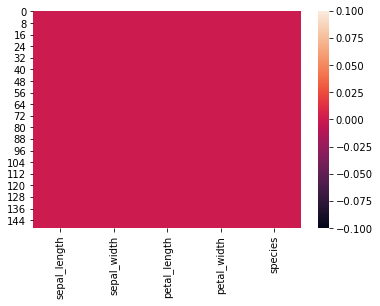

In [7]:
#to visualize null value by heatmap
sns.heatmap(df.isna())
plt.show()

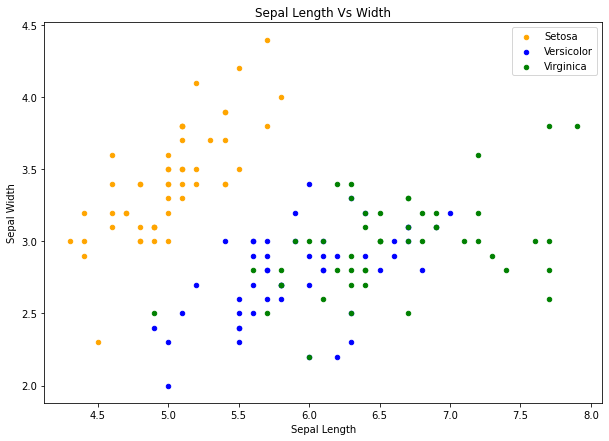

In [8]:
fig = df[df.species == 'Iris-setosa'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='orange', label='Setosa')
df[df.species == 'Iris-versicolor'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='blue', label='Versicolor', ax=fig)
df[df.species == 'Iris-virginica'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

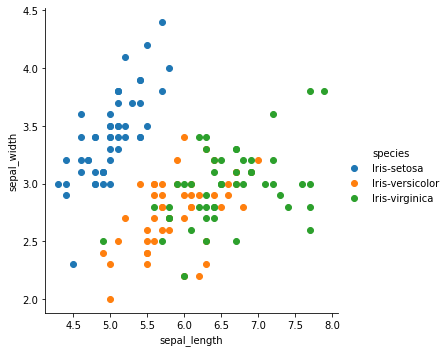

In [9]:
sns.FacetGrid(df, hue='species', size=5)\
   .map(plt.scatter, 'sepal_length', 'sepal_width')\
   .add_legend()

plt.show()

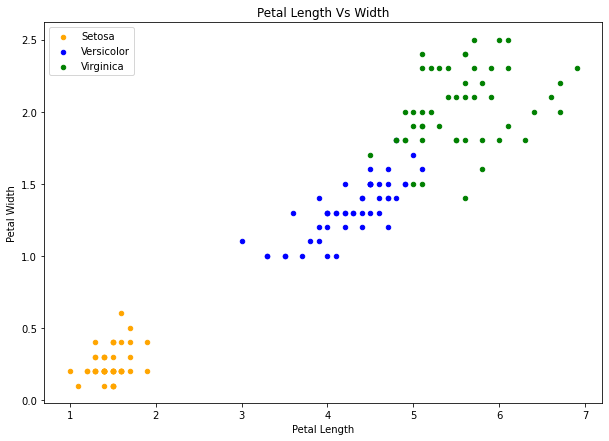

In [10]:
fig = df[df.species == 'Iris-setosa'].plot(kind='scatter', x='petal_length', y='petal_width', color='orange', label='Setosa')
df[df.species == 'Iris-versicolor'].plot(kind='scatter', x='petal_length', y='petal_width', color='blue', label='Versicolor', ax=fig)
df[df.species == 'Iris-virginica'].plot(kind='scatter', x='petal_length', y='petal_width', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

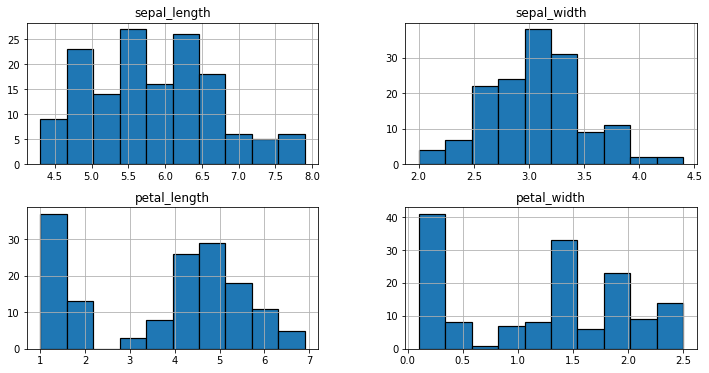

In [11]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

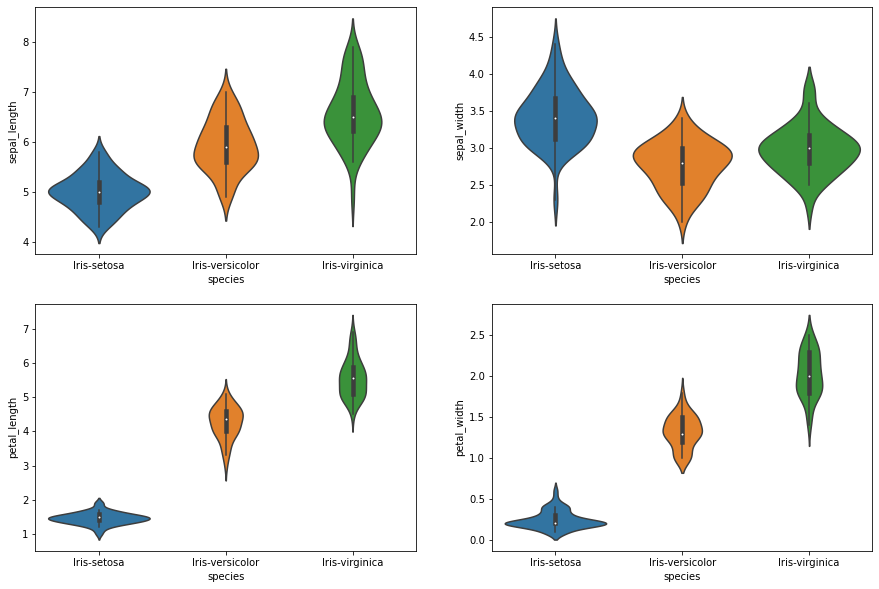

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species', y = 'sepal_length', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species', y = 'sepal_width', data=df)

plt.subplot(2,2,3)
sns.violinplot(x='species', y = 'petal_length', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species', y = 'petal_width', data=df)
plt.show()

In [13]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA
from sklearn.tree import DecisionTreeRegressor

In [14]:
df.shape

(150, 5)

In [15]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['species']= label_encoder.fit_transform(df['species'])

df['species'].unique()

array([0, 1, 2])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [17]:
#df=df.astype({"species":"float"})

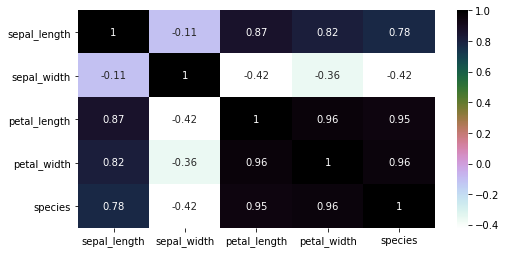

In [18]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by df.corr() 
plt.show()

In [19]:
# split the dataset into train test
train, test = train_test_split(df, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [20]:
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']] # taking the training data features
train_y = train.species # output of the training data

test_X = test[['sepal_length','sepal_width','petal_length','petal_width']] # taking test data feature
test_y = test.species # output value of the test data

In [21]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
25,5.0,3.0,1.6,0.2
128,6.4,2.8,5.6,2.1
74,6.4,2.9,4.3,1.3
149,5.9,3.0,5.1,1.8
68,6.2,2.2,4.5,1.5


In [22]:
test_X.head()

,sepal_length,sepal_width,petal_length,petal_width
130,7.4,2.8,6.1,1.9
82,5.8,2.7,3.9,1.2
77,6.7,3.0,5.0,1.7
35,5.0,3.2,1.2,0.2
15,5.7,4.4,1.5,0.4


In [23]:
train_y.head()

25     0
128    2
74     1
149    2
68     1
Name: species, dtype: int32

Support Vector Machine SVM

In [24]:
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.9333333333333333


In [25]:
#SVM is giving very good accuracy . We will continue to check the accuracy for different models.

Logistic Regression

In [26]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9333333333333333


Decision Tree

In [27]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9333333333333333


K-Nearest Neighbors

In [28]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9111111111111111


Let's Visulaize the accuracy for various values of n for K-Nearest nerighbours

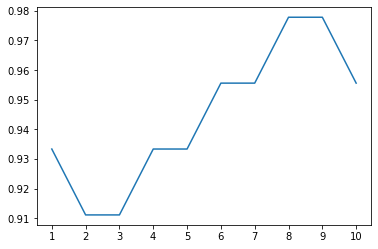

In [29]:
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)
plt.show()

In [30]:
#We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

In [31]:
#Creating Petals And Sepals Training Data
petal = df[['petal_length','petal_width','species']]
sepal = df[['sepal_length','sepal_width','species']]

In [32]:
#For Iris Petal
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[['petal_width','petal_length']]
train_y_p = train_p.species

test_x_p = test_p[['petal_width','petal_length']]
test_y_p = test_p.species

In [33]:
#For Iris Sepal
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['sepal_width','sepal_length']]
train_y_s = train_s.species

test_x_s = test_s[['sepal_width','sepal_length']]
test_y_s = test_s.species

In [34]:
#SVM algo
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepals is: 0.8


In [35]:
#Logistic Regression
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [36]:
#Decission Tree
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


In [37]:
#K-Nearest Neighbors
#model=KNeighborsClassifier(n_neighbors=3) 
#model.fit(train_x_p,train_y_p) 
#prediction=model.predict(test_x_p) 
#print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

#model.fit(train_x_s,train_y_s) 
#prediction=model.predict(test_x_s) 
#print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

In [38]:
#Using Petals over Sepal for training the data gives a much better accuracy.


In [39]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor({ 
          "model_name": "Random Forest Regressor",
          "is_selected": True,
          "min_trees": 10,
          "max_trees": 20,
          "feature_sampling_statergy": "Default",
          "min_depth": 20,
          "max_depth": 25,
          "min_samples_per_leaf_min_value": 5,
          "min_samples_per_leaf_max_value": 10,
          "parallelism": 0
        }
)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Random Forest Tree is: ', metrics.accuracy_score(prediction, test_y))



The accuracy of Random Forest Tree is:  0.9111111111111111


In [40]:
# import the regressor
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier({ 
          "is_selected": False,
          "min_trees": 10,
          "max_trees": 30,
          "feature_sampling_statergy": "Default",
          "min_depth": 20,
          "max_depth": 30,
          "min_samples_per_leaf_min_value": 5,
          "min_samples_per_leaf_max_value": 50,
          "parallelism": 0

        }
)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Random Forest Classifier is: ', metrics.accuracy_score(prediction, test_y))



The accuracy of Random Forest Classifier is:  0.9111111111111111


In [41]:
#!pip install Flask-Session

In [42]:
from flask import Flask, render_template, redirect, request, session
from flask_session import Session

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
# import the classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier({
          "is_selected": False,
          "num_of_BoostingStages": [67, 89],
          "feature_sampling_statergy": "Fixed number",
          "learningRate": [],
          "use_deviance": True,
          "use_exponential": False,
          "fixed_number": 22,
          "min_subsample": 1,
          "max_subsample": 2,
          "min_stepsize":0.1,
          "max_stepsize":0.5, 
          "min_iter":20,
          "max_iter":40,
          "min_depth":5,
          "max_depth":7

          }
)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Gradient Boosting Classifier is: ', metrics.accuracy_score(prediction, test_y))



The accuracy of Gradient Boosting Classifier is:  0.9333333333333333


In [45]:
from xgboost import XGBClassifier
# read data
#from sklearn.datasets import load_iris

# create model instance
xgb = XGBClassifier({
          "model_name": "XG Boost",
          "is_selected": False,
          "use_gradient_boosted_tree": True,
          "dart": True,
          "tree_method": "",
          "random_state": 0,
          "max_num_of_trees": 0,
          "early_stopping": True,
          "early_stopping_rounds": 2,
          "max_depth_of_tree": [56, 89], 
          "learningRate": [89, 76],
          "l1_regularization": [77],
          "l2_regularization": [78],
          "gamma": [68],
          "min_child_weight": [67],
          "sub_sample": [67],
          "col_sample_by_tree": [67],
          "replace_missing_values": False,
          "parallelism": 0
        }
)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))



The accuracy of Decision Tree is:  0.9555555555555556


In [46]:
lr = LogisticRegression({
          "model_name": "LogisticRegression",
          "is_selected": False,
          "parallelism": 2,
          "min_iter":30,
          "max_iter":50,
          "min_regparam":0.5,
          "max_regparam":0.8,
          "min_elasticnet":0.5,
          "max_elasticnet":0.8
        }
)

model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))


The accuracy of Logistic Regression is:  0.9555555555555556


In [47]:
from sklearn.linear_model import Ridge
ridge = Ridge({
          "is_selected": False,
          "regularization_term": "Specify values to test",
          "min_iter":30,
          "max_iter":50,
          "min_regparam":0.5,
          "max_regparam":0.8
        }
)

model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Ridge is: ', metrics.accuracy_score(prediction, test_y))


The accuracy of Ridge is:  0.9555555555555556


In [48]:
#Decission Tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
dtc = DecisionTreeClassifier({
          "is_selected": False,
          "min_depth":4,
          "max_depth": 7,
          "use_gini": False,
          "use_entropy": True,
          "min_samples_per_leaf": [12, 6],
          "use_best": True,
          "use_random": True
        }

)

model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree Classifier is:  0.9111111111111111


In [49]:
#Decission Tree
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
dtr = DecisionTreeRegressor({
          "is_selected": False,
          "min_depth":4,
          "max_depth": 7,
          "use_gini": False,
          "use_entropy": True,
          "min_samples_per_leaf": [12, 6],
          "use_best": True,
          "use_random": True
        }


)

model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9333333333333333


In [50]:
from sklearn.svm import SVC
model=SVC()
svc = SVC({
          "is_selected": False,
          "linear_kernel": True,
          "rep_kernel": True,
          "polynomial_kernel": True,
          "sigmoid_kernel": True,
          "c_value": [566, 79],
          "auto": True,
          "scale": True,
          "custom_gamma_values": True,
          "tolerance": 7,
          "max_iterations": 7
        }



)

model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of  SVC is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of  SVC is:  0.9333333333333333


In [51]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(max_iter=1000, tol=0.01)
'''sdg = SGDClassifier({
          "is_selected": False,
          "use_logistics": True,
          "use_modified_hubber_loss": False,
          "max_iterations": False,
          "tolerance": 56,
          "use_l1_regularization": "on",
          "use_l2_regularization": "on",
          "use_elastic_net_regularization":True,
          "alpha_value": [79, 56],
          "parallelism": 1
        }'''

model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of SGD Classifier is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of SGD Classifier is:  0.9333333333333333


In [52]:

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
knn = KNeighborsClassifier({
          "is_selected": False,
          "k_value": [78],
          "distance_weighting": True,
          "neighbour_finding_algorithm": "Automatic",
          "random_state": 0,
          "p_value": 0
        }





)

model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNeighborsClassifier is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNeighborsClassifier is:  0.9333333333333333


In [53]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
etc = ExtraTreesClassifier({
          "is_selected": False,
          "num_of_trees": [45, 489],
          "feature_sampling_statergy": "Square root and Logarithm",
          "max_depth": [12, 45],
          "min_samples_per_leaf": [78, 56],
          "parallelism": 3
        }






)

model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Extra Tree sClassifier is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Extra Tree sClassifier is:  0.8888888888888888


In [54]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
mlp = MLPClassifier({
          "is_selected": False,
          "hidden_layer_sizes": [67, 89],
          "activation": "",
          "alpha_value": 0,
          "max_iterations": 0,
          "convergence_tolerance": 0,
          "early_stopping": True,
          "solver": "ADAM",
          "shuffle_data": True,
          "initial_learning_rate": 0,
          "automatic_batching": True,
          "beta_1": 0,
          "beta_2": 0,
          "epsilon": 0,
          "power_t": 0,
          "momentum": 0,
          "use_nesterov_momentum": False
        }







)

model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of MLP Classifier is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of MLP Classifier is:  0.9555555555555556


In [55]:
from sklearn.decomposition import PCA

model=PCA()
classifier = PCA({
          "is_selected": False,
          "num_of_features_to_keep":0
        }







)

# train the model using the PCA components
model.fit(train_X,train_y)
model.score(test_X,test_y)
print('The accuracy of PCA is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of PCA is:  0.9555555555555556


In [56]:
#deployment 

#saving model using pickle
#use serialization: to store data in file in binary form 
#use inbuilt package : pickle
import pickle

In [57]:
#To save object of StandardSacler class
file2=open("scale.pkl",'wb')

#to save the object of LinearRegression class in file in binary form
#first open the temporary file
file1=open("model.pkl","wb") #wb means write binary mode
# To save the object of satandardScaler class in temp fie 2
pickle.dump(label_encoder,file2)
file2.close()
#to the write the object of LinearRegression in temporary file1, use
#inbuilt function dupm() of pickle
pickle.dump(knn,file1)#pickle.dump(object of model temp file)
file1.close() # close the emporary file

In [58]:
import os
os.getcwd()

'C:\\Users\\Meena Panday'